# Single File (Decay) Analysis and plotting

In [1]:
import numpy as np
import lifetime.decay as lm
import matplotlib.pyplot as plt
%matplotlib notebook

## Create Data

<IPython.core.display.Javascript object>


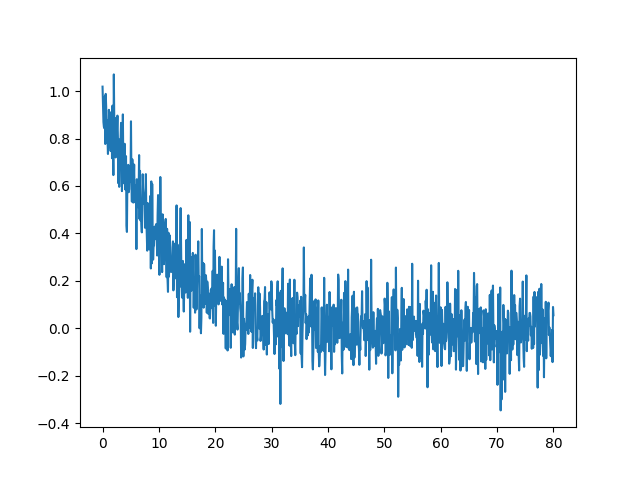

In [2]:
a = 1             # Amplitude
tau = 10          # Lifetime in ms
c = 0             # Noise offset
p_init = [a, tau, c]

x = np.linspace(0, 8*tau, num=1000)
y = lm.decay_fn(x, *p_init)

# Add noise to signal. Std of % a
y += np.random.normal(0, 0.1*a, 1000)

plt.figure()
plt.plot(x, y)

## Prepare Data

<IPython.core.display.Javascript object>


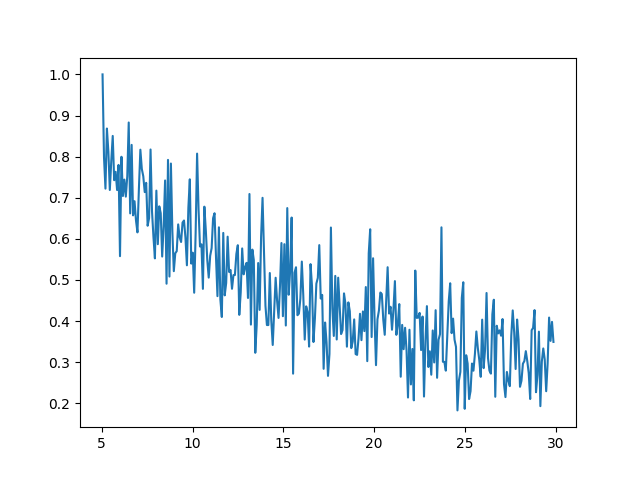

In [4]:
x, y = lm.prepare_data(x,y, reject_start=5)

plt.figure()
plt.plot(x, y)

## Fit data

In [81]:
lm.fit_decay(x, y)

array([ 0.80593758,  9.52544747,  0.3217452 ])

In [82]:
p = lm.minimize_fit(x, y)
p

array([ 0.80593722,  9.52545252,  0.32174518])

<IPython.core.display.Javascript object>


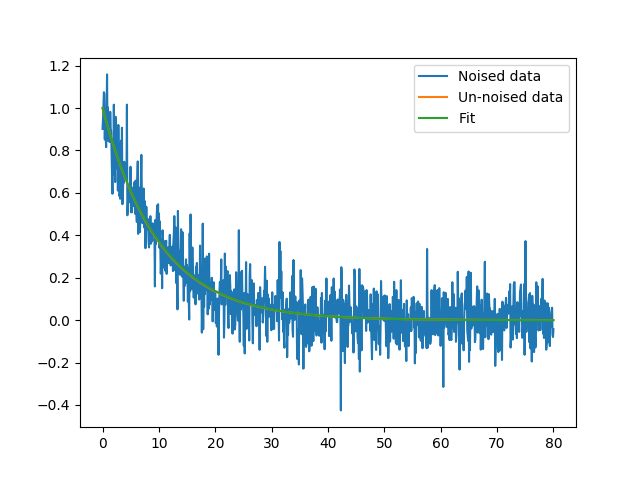

In [79]:
plt.figure()
plt.plot(x, y, label='Noised data')
plt.plot(x, lm.decay_fn(x, *p_init), label='Un-noised data')
plt.plot(x, lm.decay_fn(x, *p), label='Fit')
plt.legend()

## Time functions

In [7]:
%timeit lm.fit_decay(x, y)

1000 loops, best of 3: 669 µs per loop


In [12]:
%timeit lm.minimize_fit(x, y)

10 loops, best of 3: 76.3 ms per loop
